# Assignment


You have already picked out the dataset you want to work with. 

----

# Question 
1. EDA, i want to see some insights, present it neatly. 
2. Make the best presentation possible.
3. Fit a Decision Tree Classifier.
4. I want to see your trainning accuracy, testing accuracy and your confusion matrix. 
5. That's all, nothing more ^_^

Best of luck !!

![](https://media.tenor.com/fNpgCzeyhwgAAAAC/best-of-luck-good-luck.gif)

# ---------------------------------------------------------------------------------------------------------------

# Table of contents

    1--------------Importing the libraries
    2--------------Data cleaning.(Removing the unecessary columns and na values)
    3--------------EDA(Exploratory data analysis)
    4--------------Label Encoding the y train
    5--------------one hot encoding the x train
    6--------------Train test split
    7--------------Decision tree
    8--------------Accuracy score and confusion matrix

# ---------------------------------------------------------------------------------------------------------------

In [1]:
# Here I am importing all the libraries.
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Reading the csv file using pandas
df=pd.read_csv('Bank customer churn dataset.csv')

#Passing the command to display all the columns in the dataset.
pd.set_option('display.max_columns', None)

In [3]:
#Displaying the dataset
df

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...     

In [4]:
#Removing some unwanted columns from the dataset.
df = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'])
df = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
df = df.drop(columns=['CLIENTNUM'])

#Removing the na values
df = df.dropna()

In [6]:
#Displaying the datset.
df

Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0

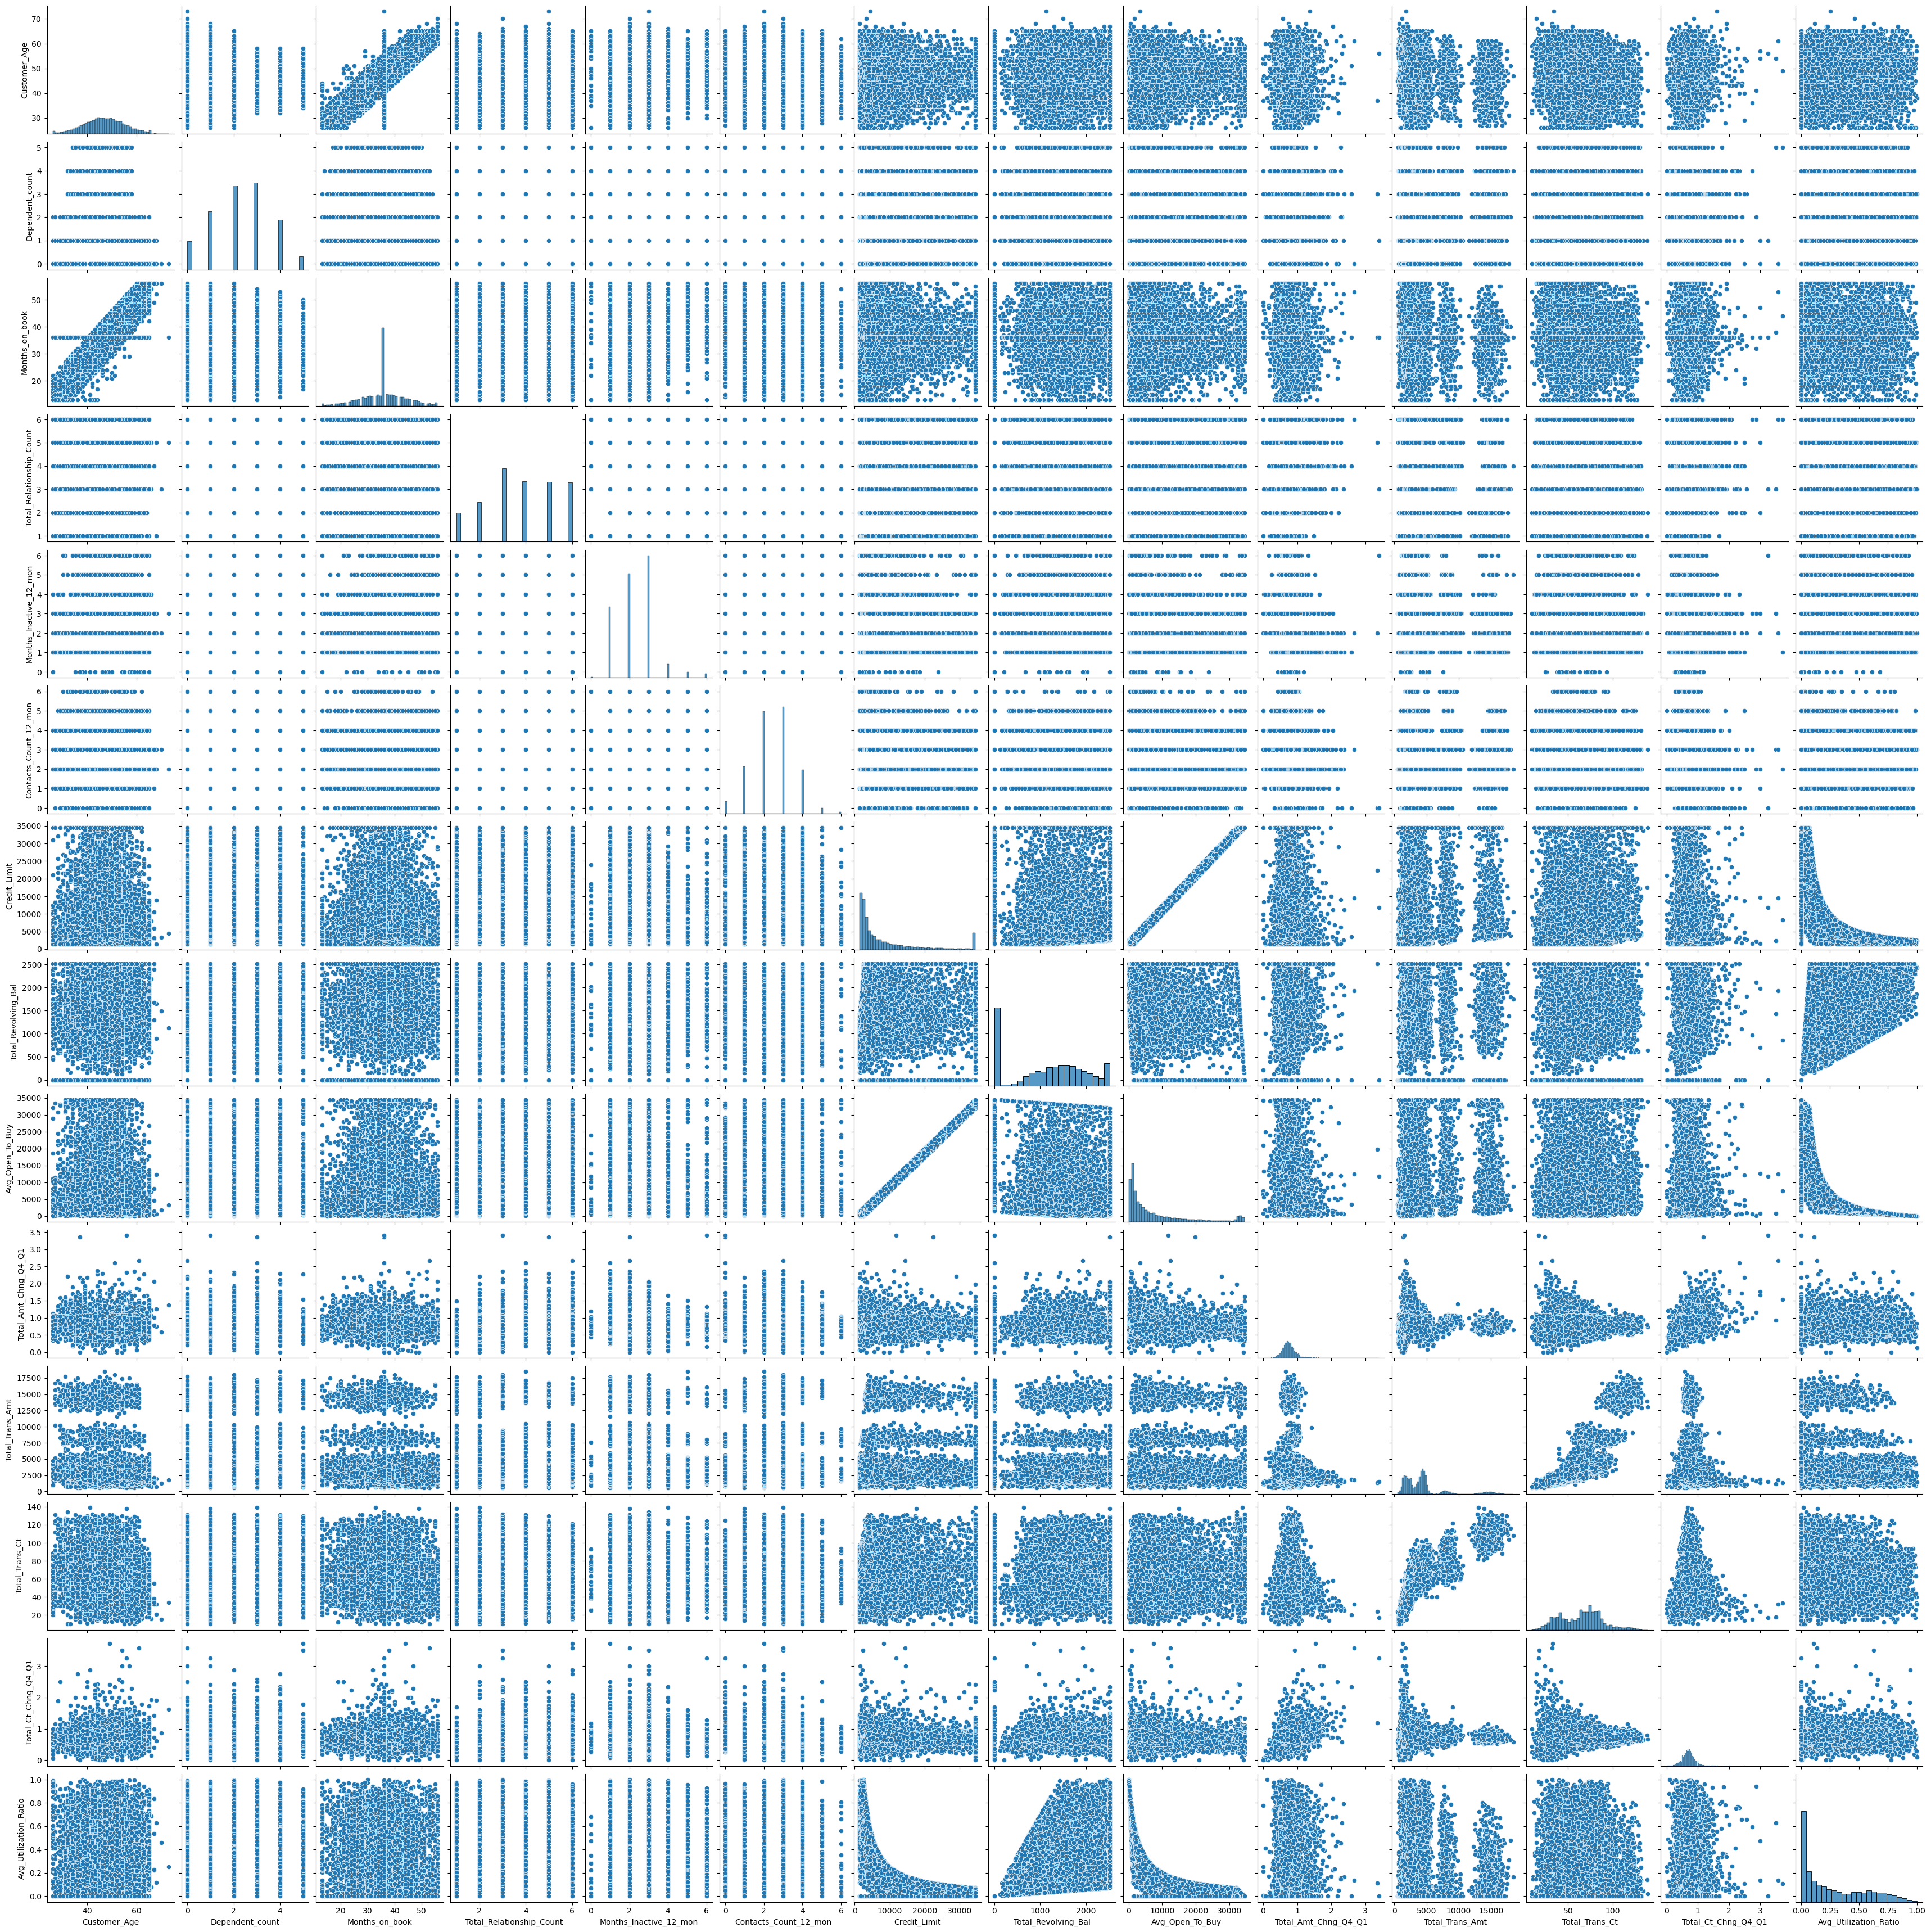

In [5]:
#Using a pairplot to plot the scatter plot for all combinations of numerical data from the dataset.
sns.pairplot(df)

# ---------------------------------------------------------------------------------------------------------------

# Distribution of attrition and gender distribution

Text(0.5, 1.0, 'Gender Distribution')

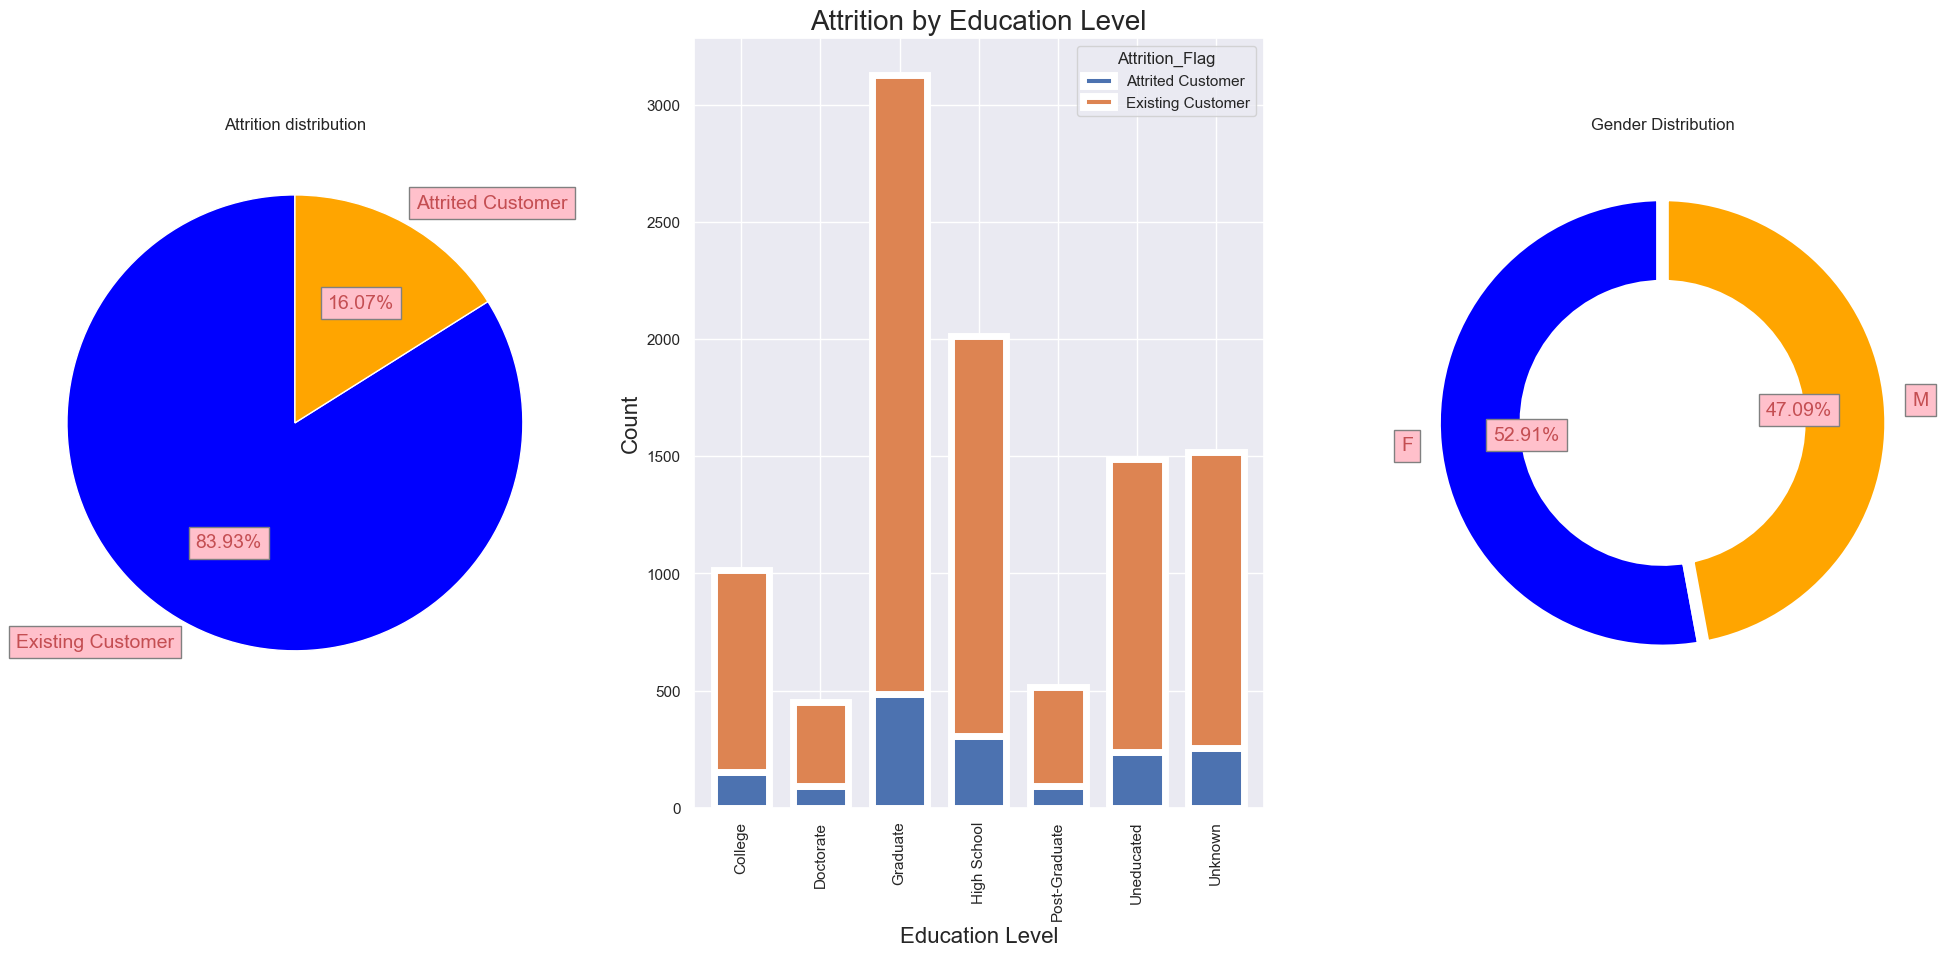

In [31]:
#Setting the figure and making a stacked bar chart,
income_gender_churn = df.groupby(['Education_Level', 'Attrition_Flag'])['Attrition_Flag'].count().unstack()
fig, (ax1,ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(25, 10))
dept_colors = ['blue', 'orange']

income_gender_churn.plot(kind='bar', stacked=True, edgecolor='white', linewidth=5, width=0.7, ax=ax2)
hello=df['Attrition_Flag'].value_counts()
ax1.pie(hello, labels=hello.index, autopct='%2.2f%%', startangle=90, textprops={'color':'r', 'fontsize': 14, 'bbox': {'facecolor': 'pink', 'edgecolor': 'gray', 'pad': 5}},colors=dept_colors)
ax1.set_title('Attrition distribution')
#-------------------------------------------------------------------------------------------------------------------------------
# Add labels and titles for ax1
ax2.set_xlabel('Education Level', fontsize=16)
ax2.set_ylabel('Count', fontsize=16)
ax2.set_title('Attrition by Education Level', fontsize=20)
#-------------------------------------------------------------------------------------------------------------------------------
dept_colors2 = ['blue', 'orange']
wedgeprops = {'linewidth': 9, 'edgecolor': 'white', 'width': 0.4}
bt_counts = df['Gender'].value_counts()
ax3.pie(bt_counts, labels=bt_counts.index,wedgeprops=wedgeprops, autopct='%2.2f%%', startangle=90, textprops={'color':'r', 'fontsize': 14, 'bbox': {'facecolor': 'pink', 'edgecolor': 'gray', 'pad': 5}},colors=dept_colors2)
ax3.set_title('Gender Distribution')

# Fickle minded graduates!!!
    .Highest attrition being praciced by graduates.
    .The HR should properly scrutinize before hiring any graduates.
    .Good news!, the company has a boast worthy gender diversity.

# ---------------------------------------------------------------------------------------------------------------

# Transactional behaviour of customers and credit usage.

Text(15000, 60, 'Segment 3')

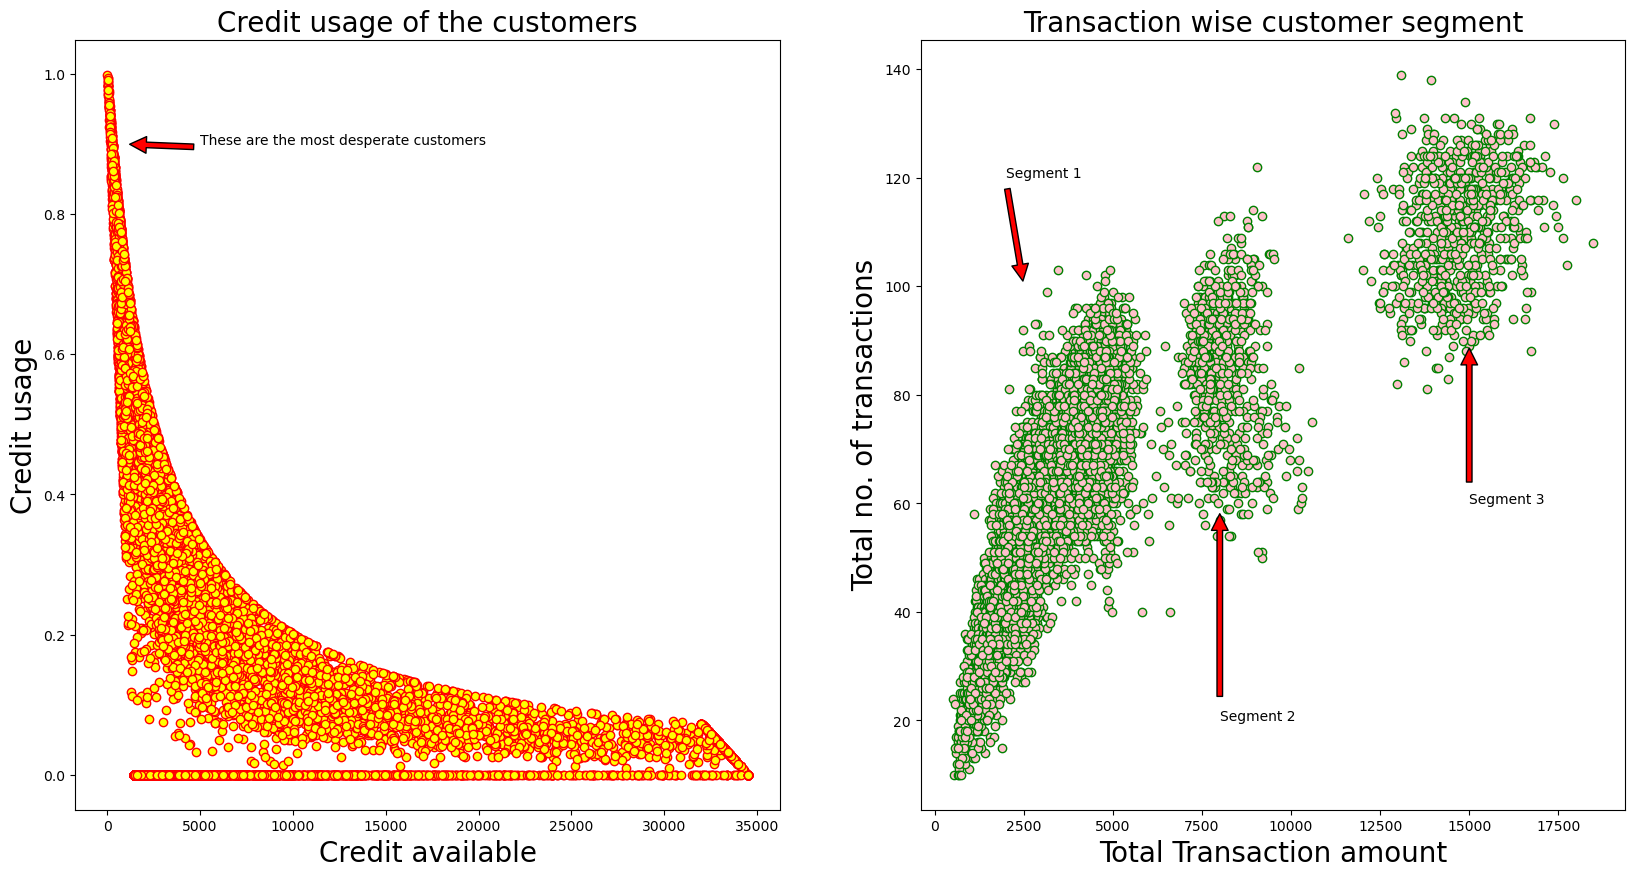

In [6]:
# Defining the figure.
fig, axs = plt.subplots(1, 2, figsize=(20,10))

#Plotting the scatter plot in the first figure along with title, x and y label.
axs[0].scatter(df['Avg_Open_To_Buy'], df['Avg_Utilization_Ratio'],facecolor='yellow',edgecolor='red')
axs[0].set_title('Credit usage of the customers',fontsize=20)
axs[0].set_xlabel('Credit available',fontsize=20)
axs[0].set_ylabel('Credit usage',fontsize=20)
axs[0].annotate('These are the most desperate customers', 
            xy=(1000, 0.9), # The xy decides where the arrow will point to
            xytext=(5000, 0.9),  # The xytext decides where the text will start from.
            arrowprops = {'facecolor': 'red', 'shrink': 0.05} # The arrowprops takes a dictionary as input. It wants the color of the arrow and the size of the arrow. 
           )

#-------------------------------------------------------------------------------------------------------------------------------

#Plotting the scatter plot in the second figure along with title, x and y label.
axs[1].scatter(df['Total_Trans_Amt'], df['Total_Trans_Ct'],facecolor='pink',edgecolor='green')
axs[1].set_title('Transaction wise customer segment',fontsize=20)
axs[1].set_xlabel('Total Transaction amount',fontsize=20)
axs[1].set_ylabel('Total no. of transactions',fontsize=20)
axs[1].annotate('Segment 1', 
            xy=(2500, 100), # The xy decides where the arrow will point to
            xytext=(2000, 120),  # The xytext decides where the text will start from.
            arrowprops = {'facecolor': 'red', 'shrink': 0.05} # The arrowprops takes a dictionary as input. It wants the color of the arrow and the size of the arrow. 
           )

#-------------------------------------------------------------------------------------------------------------------------------

#Annotating the plots.
axs[1].annotate('Segment 2', 
            xy=(8000, 60), # The xy decides where the arrow will point to
            xytext=(8000, 20),  # The xytext decides where the text will start from.
            arrowprops = {'facecolor': 'red', 'shrink': 0.05} # The arrowprops takes a dictionary as input. It wants the color of the arrow and the size of the arrow. 
           )
axs[1].annotate('Segment 3', 
            xy=(15000, 90), # The xy decides where the arrow will point to
            xytext=(15000, 60),  # The xytext decides where the text will start from.
            arrowprops = {'facecolor': 'red', 'shrink': 0.05} # The arrowprops takes a dictionary as input. It wants the color of the arrow and the size of the arrow. 
           )

>Customers with lower available credit may be relying more heavily on their credit card to make purchases, which leads to higher utilization rates. This could be due to a variety of factors, such as a lower income or unexpected expenses that reduce available cash.

>Another possible reason could be that customers with higher available credit may be more financially stable or have more experience managing credit, which leads to lower utilization rates. These customers may be more likely to pay off their balances in full each month or use other forms of payment for certain purchases.

> Based in the transaction activity, customers may be divided into three segments.

# ---------------------------------------------------------------------------------------------------------------

# Attrited vs Extising customers(In terms of transactional behaviour)

In [7]:
# Making separate dataset using only the rows where Attrition_Flag is Existing Customer
df_Extising=df[df["Attrition_Flag"]=='Existing Customer']
#-------------------------------------------------------------------------------------------------------------------------------
# Making separate dataset using only the rows where Attrition_Flag is Attrited Customer
df_Attrited=df[df["Attrition_Flag"]=='Attrited Customer']

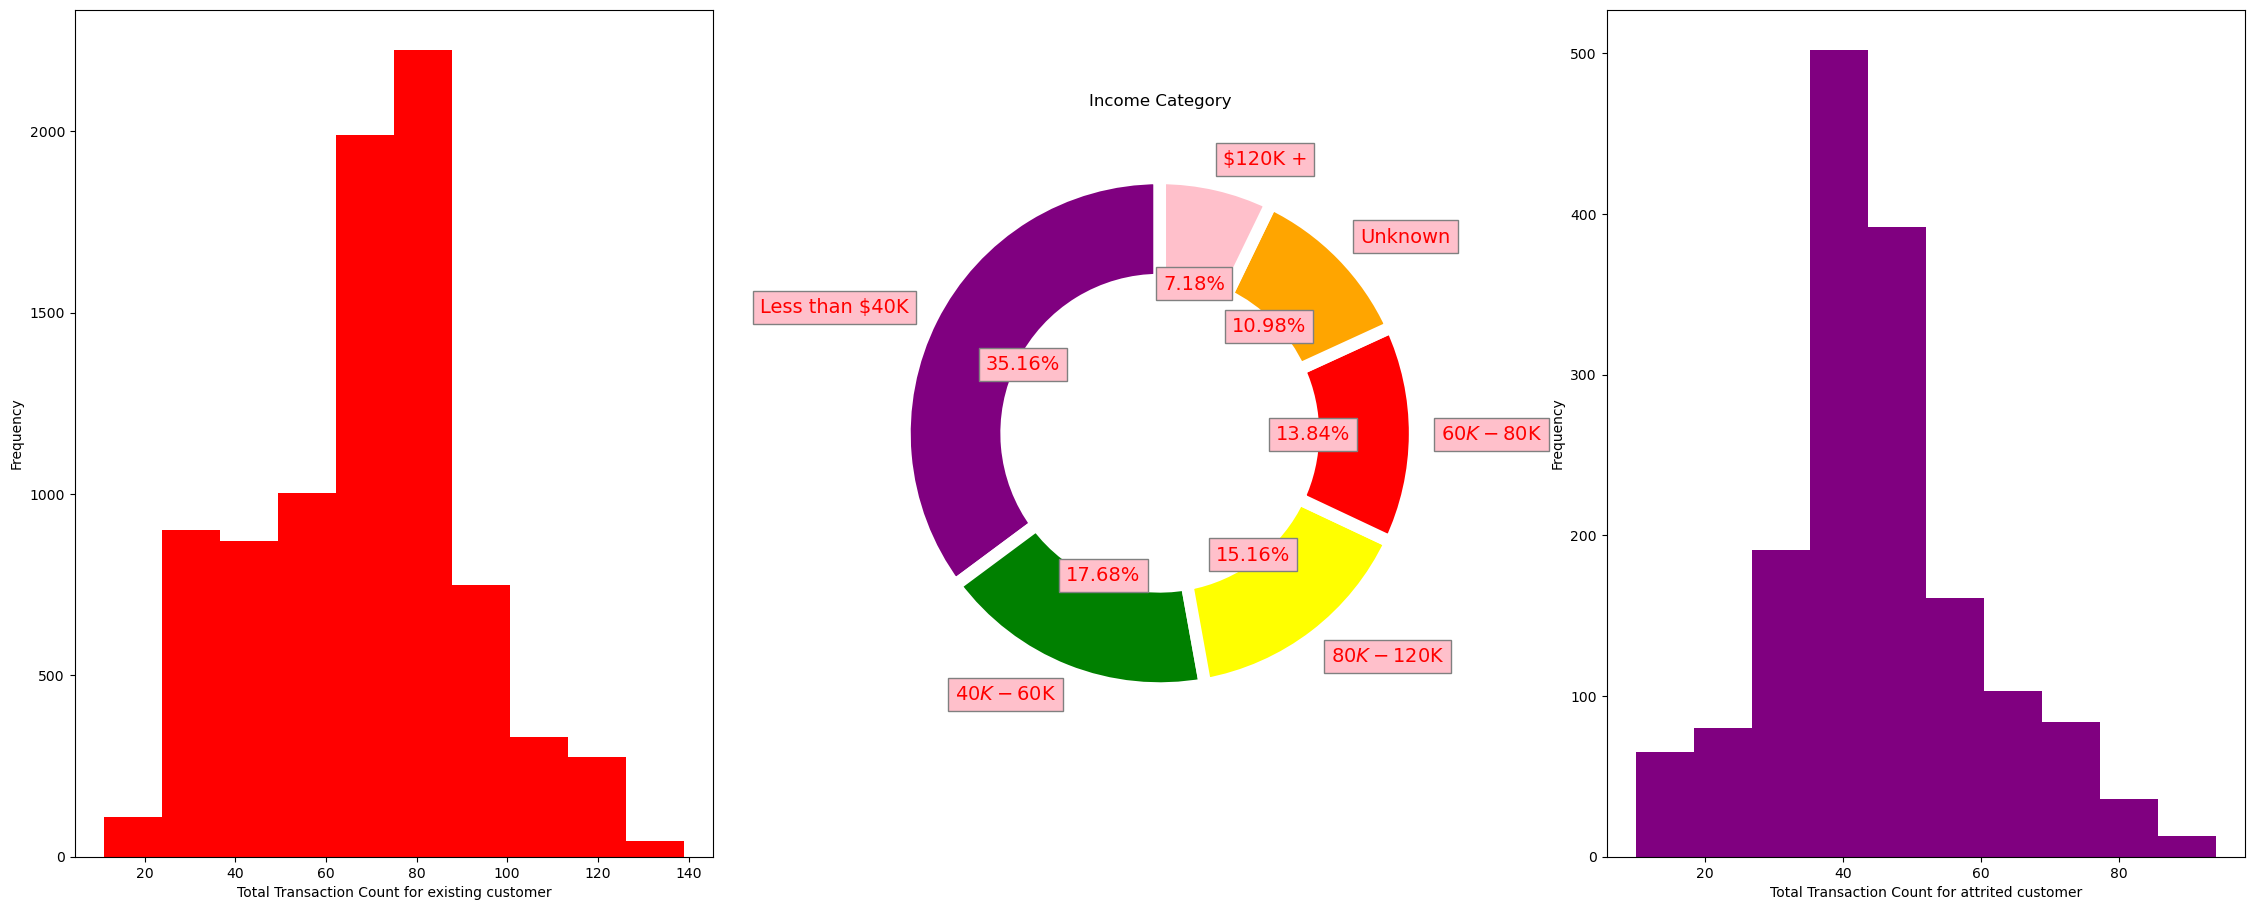

In [9]:
# Define color palette
my_palette = {"Existing Customer": "purple", "Attrited Customer": "yellow"}
#-------------------------------------------------------------------------------------------------------------------------------
# Create figure and axes objects
fig, ax = plt.subplots(1, 3, figsize=(28, 11))
#-------------------------------------------------------------------------------------------------------------------------------
# Create catplot with specified color palette and ax parameter
ax[0].hist(df_Extising["Total_Trans_Ct"],color='red')
ax[2].hist(df_Attrited["Total_Trans_Ct"],color='purple')
#-------------------------------------------------------------------------------------------------------------------------------
# Set x and y axis labels
ax[0].set_xlabel("Total Transaction Count for existing customer")
ax[0].set_ylabel("Frequency")

dept_colors = ['Purple', 'Green', 'Yellow', 'red','Orange','pink']
wedgeprops = {'linewidth': 9, 'edgecolor': 'white', 'width': 0.4}
bt_counts = df['Income_Category'].value_counts()
ax[1].pie(bt_counts, labels=bt_counts.index,wedgeprops=wedgeprops, autopct='%2.2f%%', startangle=90, textprops={'color':'r', 'fontsize': 14, 'bbox': {'facecolor': 'pink', 'edgecolor': 'gray', 'pad': 5}},colors=dept_colors)
ax[1].set_title('Income Category')
#-------------------------------------------------------------------------------------------------------------------------------
#Setting the x and the y label for the histogram in the 3rd section.
ax[2].set_xlabel("Total Transaction Count for attrited customer")
ax[2].set_ylabel("Frequency")
#------------------------------------------------------------------------------------------------------------------------------
# Show plot
plt.show()

# To provide more clarity.
    We cater to customer with eclectic incomes.
    Most of our customers, earn below $40k.
    The transaction frequency of existing customer is 4 time more than the attrited ones.

# ---------------------------------------------------------------------------------------------------------------

# Does card category effect the transactional behaviour of the customers.

<AxesSubplot:xlabel='Card_Category', ylabel='Total_Trans_Amt'>

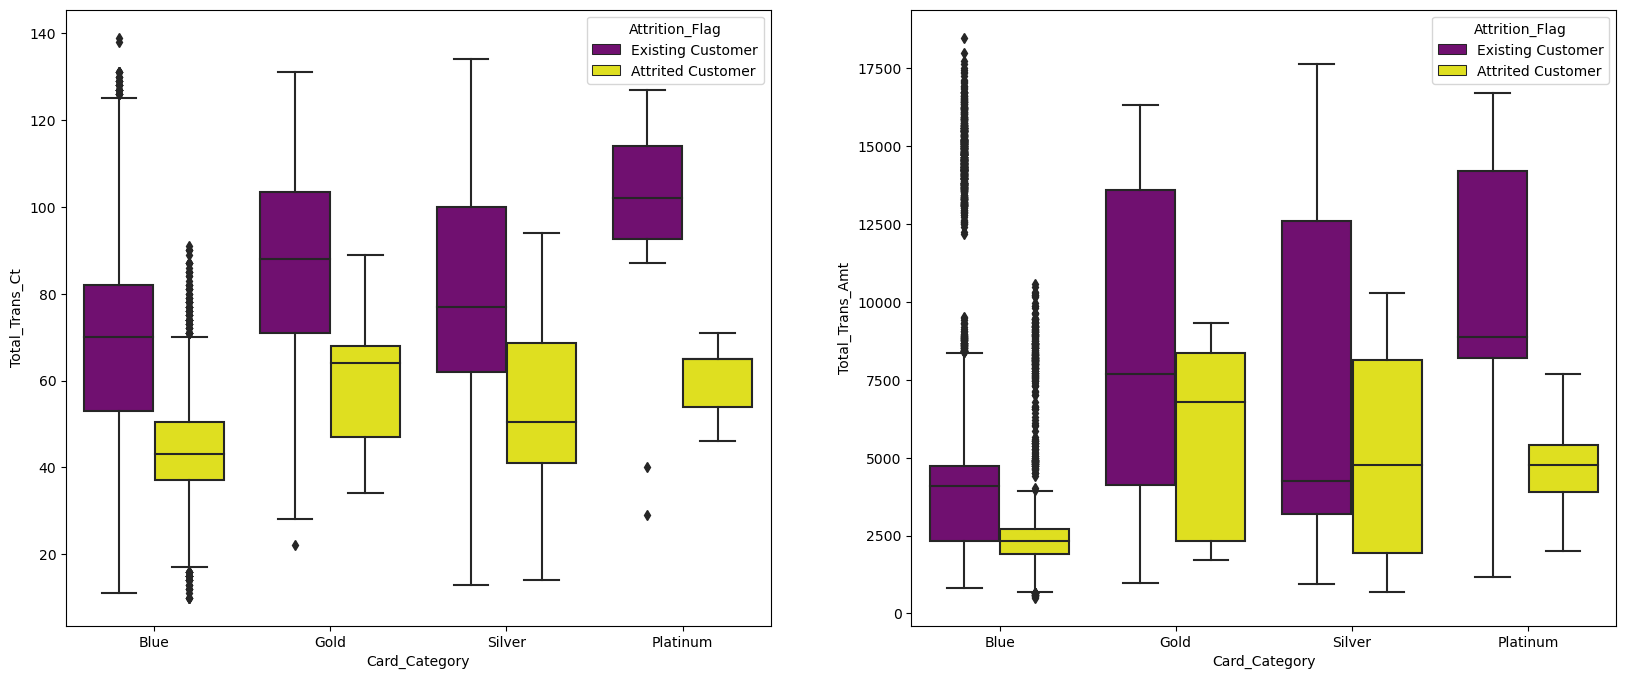

In [16]:
#Setting the figure
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

#-------------------------------------------------------------------------------------------------------------------------------

# Define color palette
my_palette = {"Existing Customer": "purple", "Attrited Customer": "yellow"}
sns.boxplot(x="Card_Category", y="Total_Trans_Ct", hue="Attrition_Flag", data=df, palette=my_palette, ax=ax[0])
sns.boxplot(x="Card_Category", y="Total_Trans_Amt", hue="Attrition_Flag", data=df, palette=my_palette, ax=ax[1])

    .Customers with platinum card transact most number of times and most amount of money irrespective of churn
    .The exact reverse goes for the customer with Blue cards, probably because of less incentives.


# ---------------------------------------------------------------------------------------------------------------

# Impact of customers education level on their banking habits.

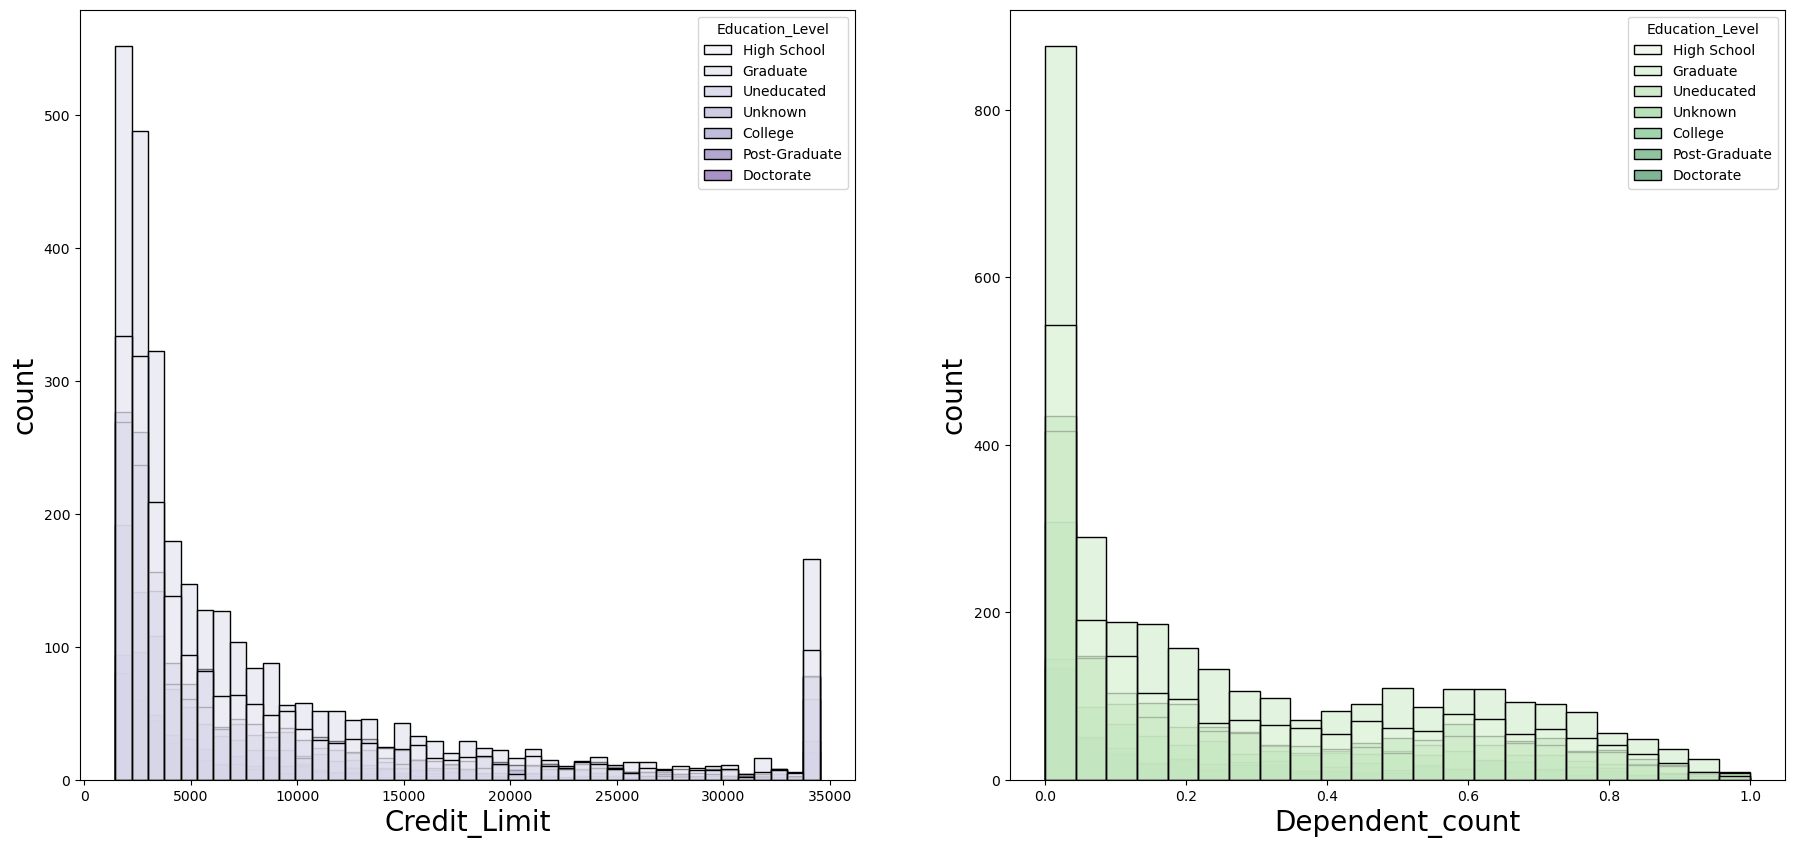

In [51]:
#Setting the figure.
fig, ax = plt.subplots(1, 2, figsize=(22, 10))
#-----------------------------------------------------------------------------------------------------------
#Plotting the histogram for the 1st section
hi=sns.histplot(data=df, x='Credit_Limit',hue='Education_Level', palette="Purples",ax=ax[0])
#-----------------------------------------------------------------------------------------------------------
# Setting x and y label
ax[0].set_xlabel("Credit_Limit", fontsize=20)
ax[0].set_ylabel("count", fontsize=20)
#----------------------------------------------------------------------------------------------------------
#Plotting the histogram for the 1st section
hi=sns.histplot(data=df, x='Avg_Utilization_Ratio',hue='Education_Level', palette="Greens",ax=ax[1])
#----------------------------------------------------------------------------------------------------------
# Setting x and y label
ax[1].set_xlabel("Dependent_count", fontsize=20)
ax[1].set_ylabel("count", fontsize=20)

plt.show()


# ---------------------------------------------------------------------------------------------------------------

# Distribution plot of total amount charged from customers (quaters 1 and 4)

Text(0.756, 120, 'Median = 0.74')

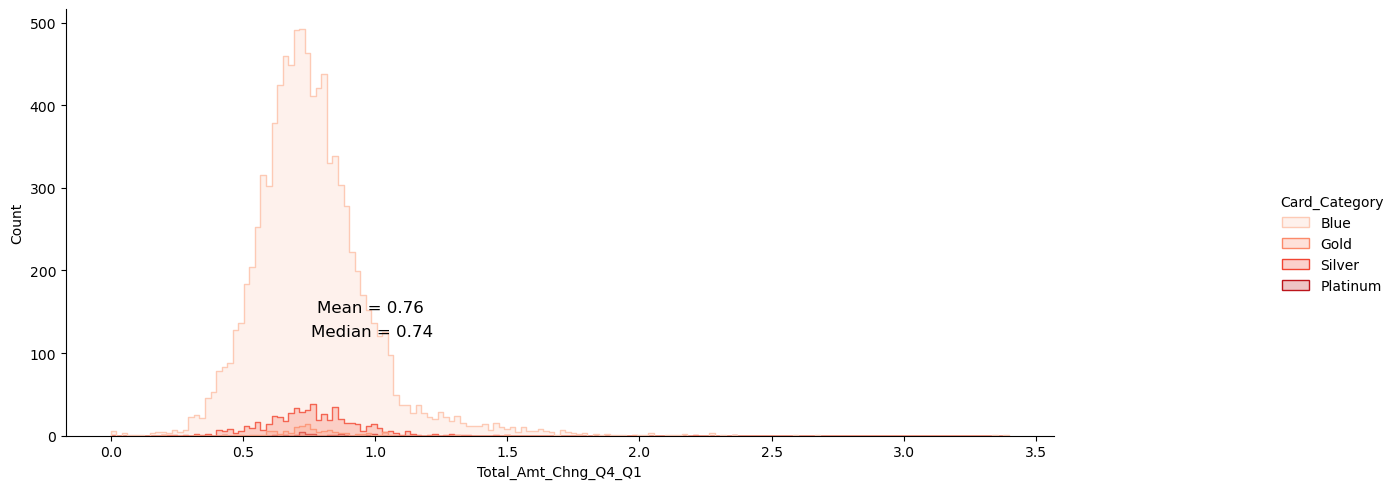

In [80]:
#Plotting the distribution plot and setting the figure size.
sns.displot(data=df, x="Total_Amt_Chng_Q4_Q1", hue="Card_Category", element="step", palette="Reds")
plt.gcf().set_size_inches(15, 5)
#--------------------------------------------------------------------------------------------------------
#Taking the mean and median of the variables and storing them in their respective variables.
mean_value = df["Total_Amt_Chng_Q4_Q1"].mean()
median_value = df["Total_Amt_Chng_Q4_Q1"].median()
#---------------------------------------------------------------------------------------------------------
plt.text(mean_value + 0.02, 150, f"Mean = {mean_value:.2f}", fontsize=12, ha="left")
plt.text(median_value + 0.02, 120, f"Median = {median_value:.2f}", fontsize=12, ha="left")

# ---------------------------------------------------------------------------------------------------------------

# Months_on_book vs Total_Amt_Chng_Q4_Q1 (Bivariate approach)

In [82]:
# Importing the library.
import matplotlib.colors as mcolors

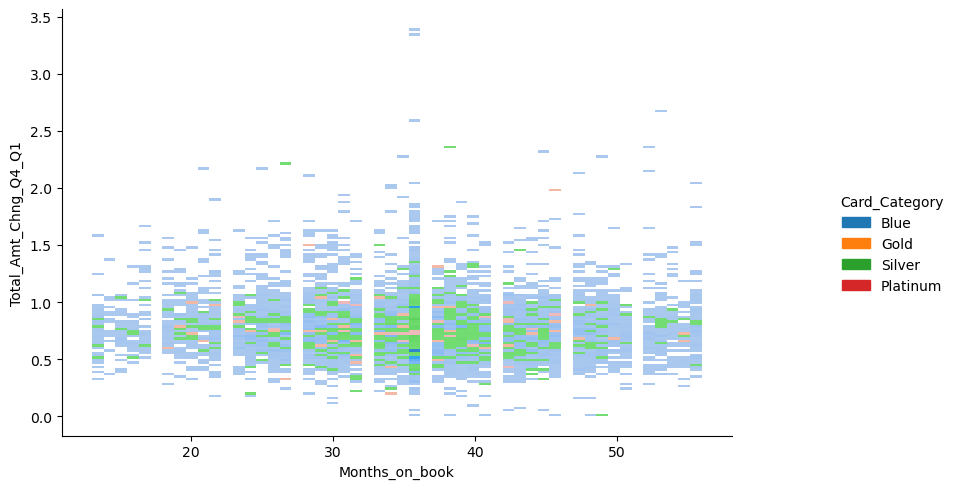

In [48]:
# Plotting the bivariate chart and setting the figure.
sns.displot(df, x="Months_on_book", y="Total_Amt_Chng_Q4_Q1",hue='Card_Category')
ax = plt.gca()
ax.figure.set_size_inches(10, 5)

#-------------------------------------------------------------------------------------------------------------------------------

#Displaying the plot
plt.show()

# Observations:
    .Most of the green cards are given to the customers who are assiciated with the bank for 30-40 months.
    .Majority of the customer have blue cards.

# ---------------------------------------------------------------------------------------------------------------

# Age distribution of the bank's customers

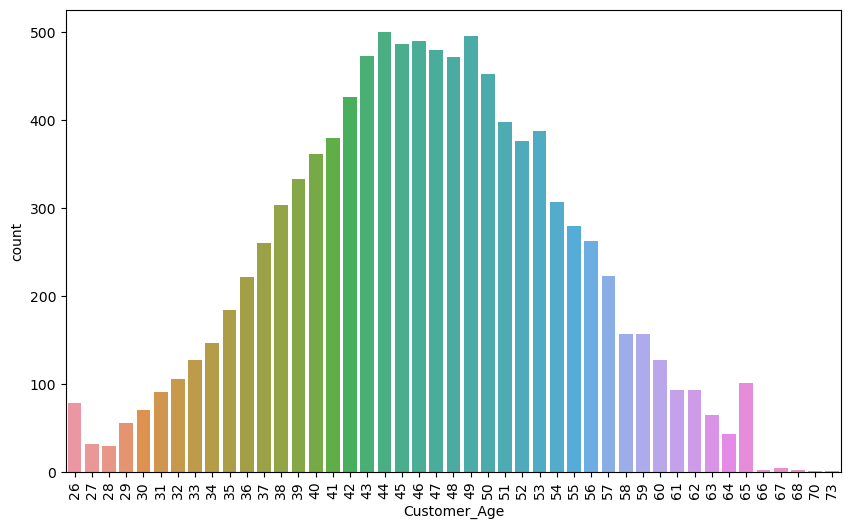

In [47]:
#Setting the figure size.
plt.figure(figsize=(10, 6))
#------------------------------------------------------------------------------------------------------------------------------
#Plotting the count plot
sns.countplot(data=df, x='Customer_Age')
plt.xticks(rotation=90)
#------------------------------------------------------------------------------------------------------------------------------
#Displaying the plot
plt.show()

# The banks genrally deals:
    .With middle aged customers with the age range 41-51(ballpark figure).
    .This graph also expounds the investing lifecycle of a person.
------------------------------------------------------------------------------------------------------------------------------
   When young, people start investing, when middled aged, they peak their investments, when old they withdraw from investing.

# ---------------------------------------------------------------------------------------------------------------

In [46]:
sns.reset_defaults()

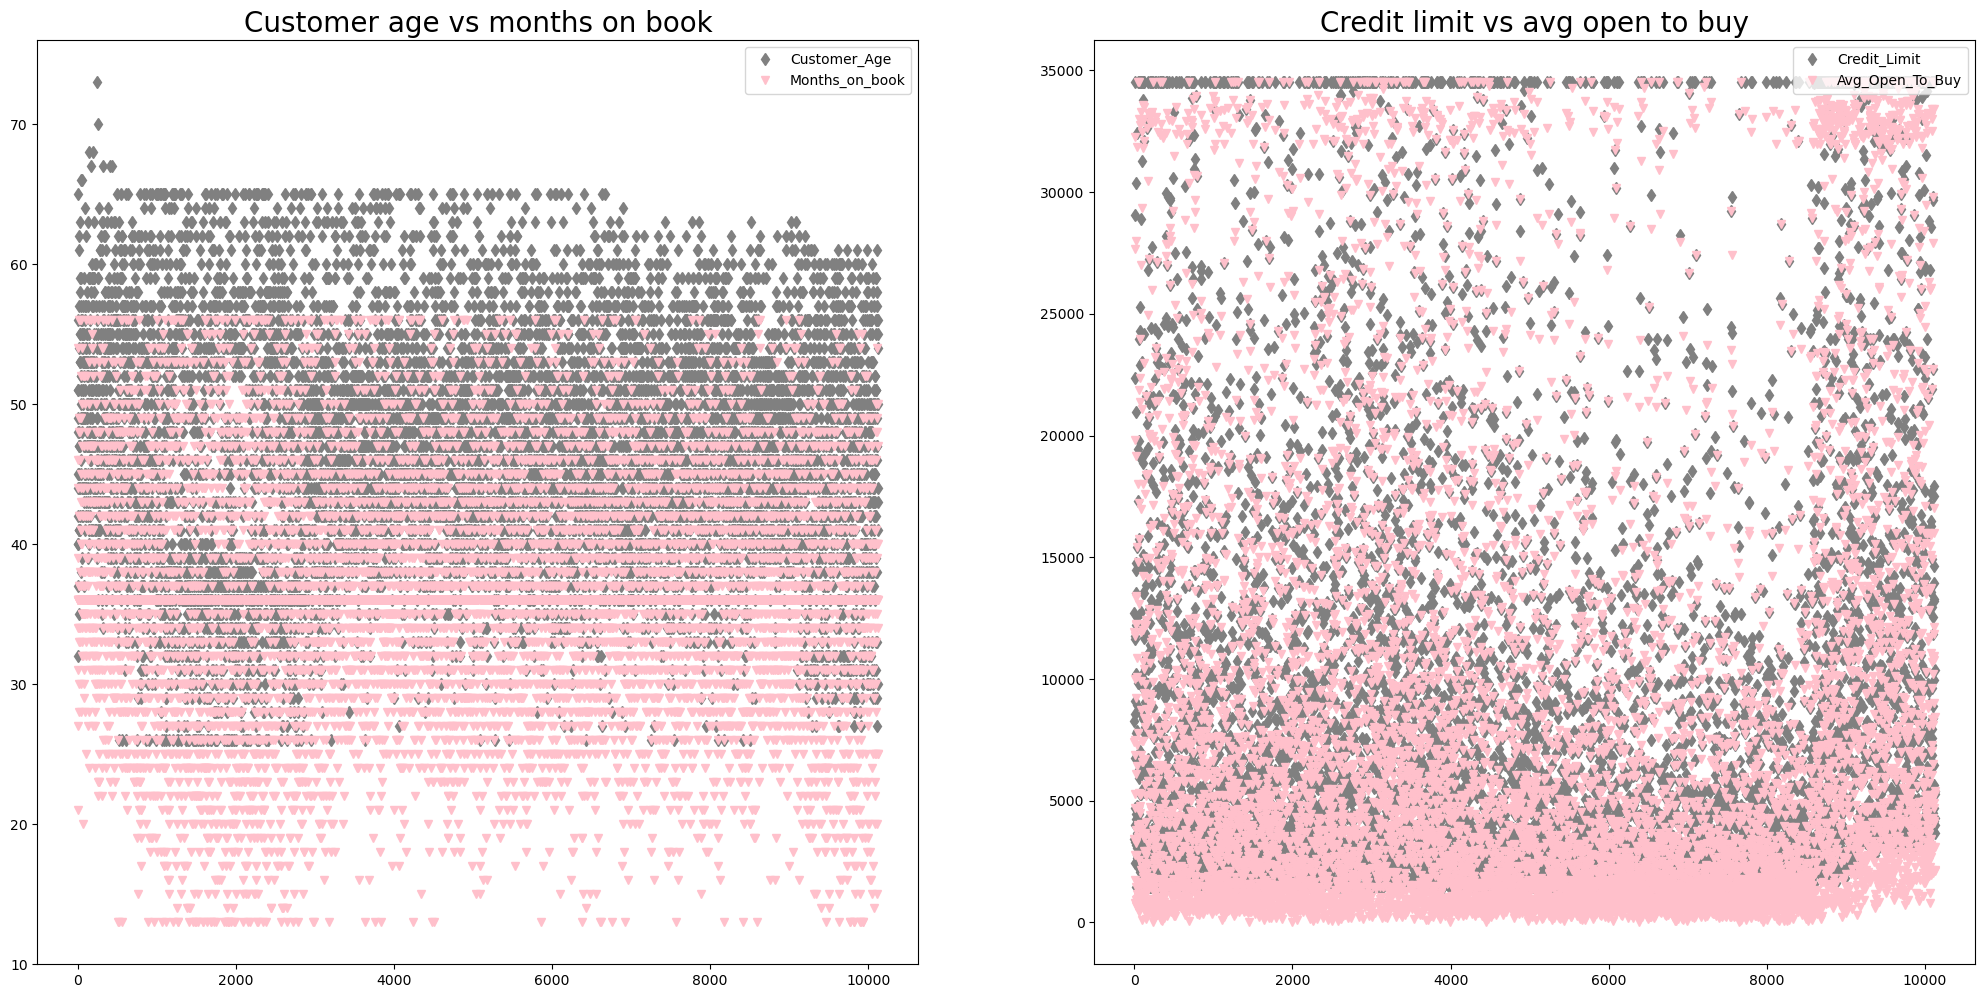

In [107]:
#Setting the figure.
fig, ax = plt.subplots(1, 2, figsize=(25, 12))
#------------------------------------------------------------------------------------------------------------------------------
# Plotting in the first section of the figure,
ax[0].plot(df['Customer_Age'], 'd', color='Grey', label='Customer_Age')
ax[0].plot(df['Months_on_book'], 'v', color='Pink', label='Months_on_book')
ax[0].set_title('Customer age vs months on book',fontsize=20)
ax[0].legend()
#------------------------------------------------------------------------------------------------------------------------------
# Plotting in the second section of the figure,
ax[1].plot(df['Credit_Limit'], 'd', color='Grey', label='Credit_Limit')
ax[1].plot(df['Avg_Open_To_Buy'], 'v', color='Pink', label='Avg_Open_To_Buy')
ax[1].set_title('Credit limit vs avg open to buy',fontsize=20)
ax[1].legend(loc="upper right")

plt.show()

# ---------------------------------------------------------------------------------------------------------------

# Age of existing/attrited customers with different card types

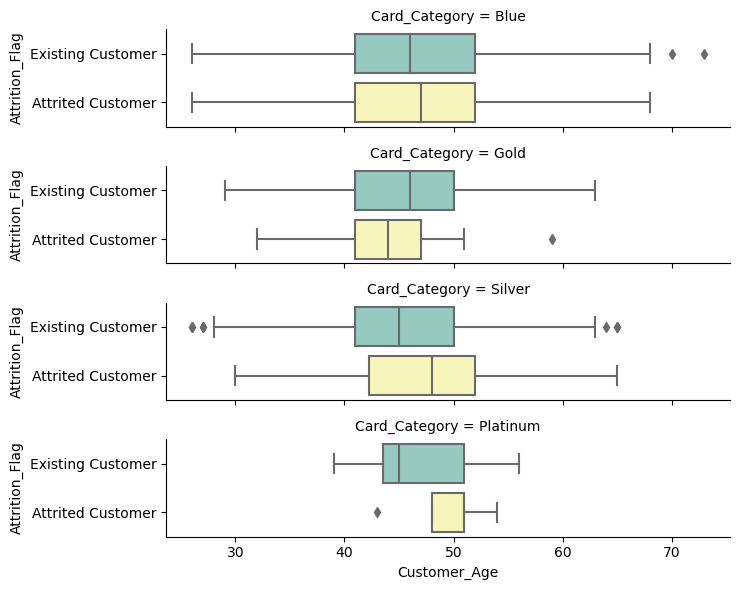

In [100]:
#Plotting the cat plot of type box plots
sns.catplot(y="Attrition_Flag", x="Customer_Age", row="Card_Category", kind="box", data=df, height=1.5, aspect=5, orient='h',palette='Set3')

# Some observarions:    
    .Blue card is being given to all the customers irrespective of age.
    .Platinum card is only given to middle aged customers.
    .In the gold card category, young customers are leaning the company.
    .In the silver card category,attrited customers does not belong to a specific age group.

# ---------------------------------------------------------------------------------------------------------------

# Credit limit and  density

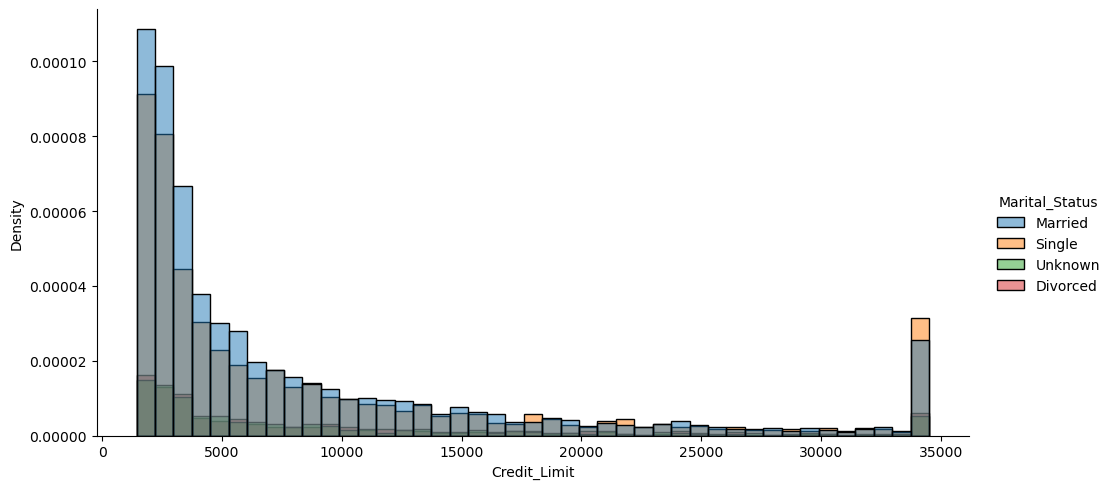

In [26]:
#Distribution plot
sns.displot(df, x="Credit_Limit", hue="Marital_Status", stat="density",height=5,aspect=2)

# ---------------------------------------------------------------------------------------------------------------

# Is the bank resorting to sexist policies while setting up the credit limit?

<AxesSubplot:xlabel='Credit_Limit', ylabel='Density'>

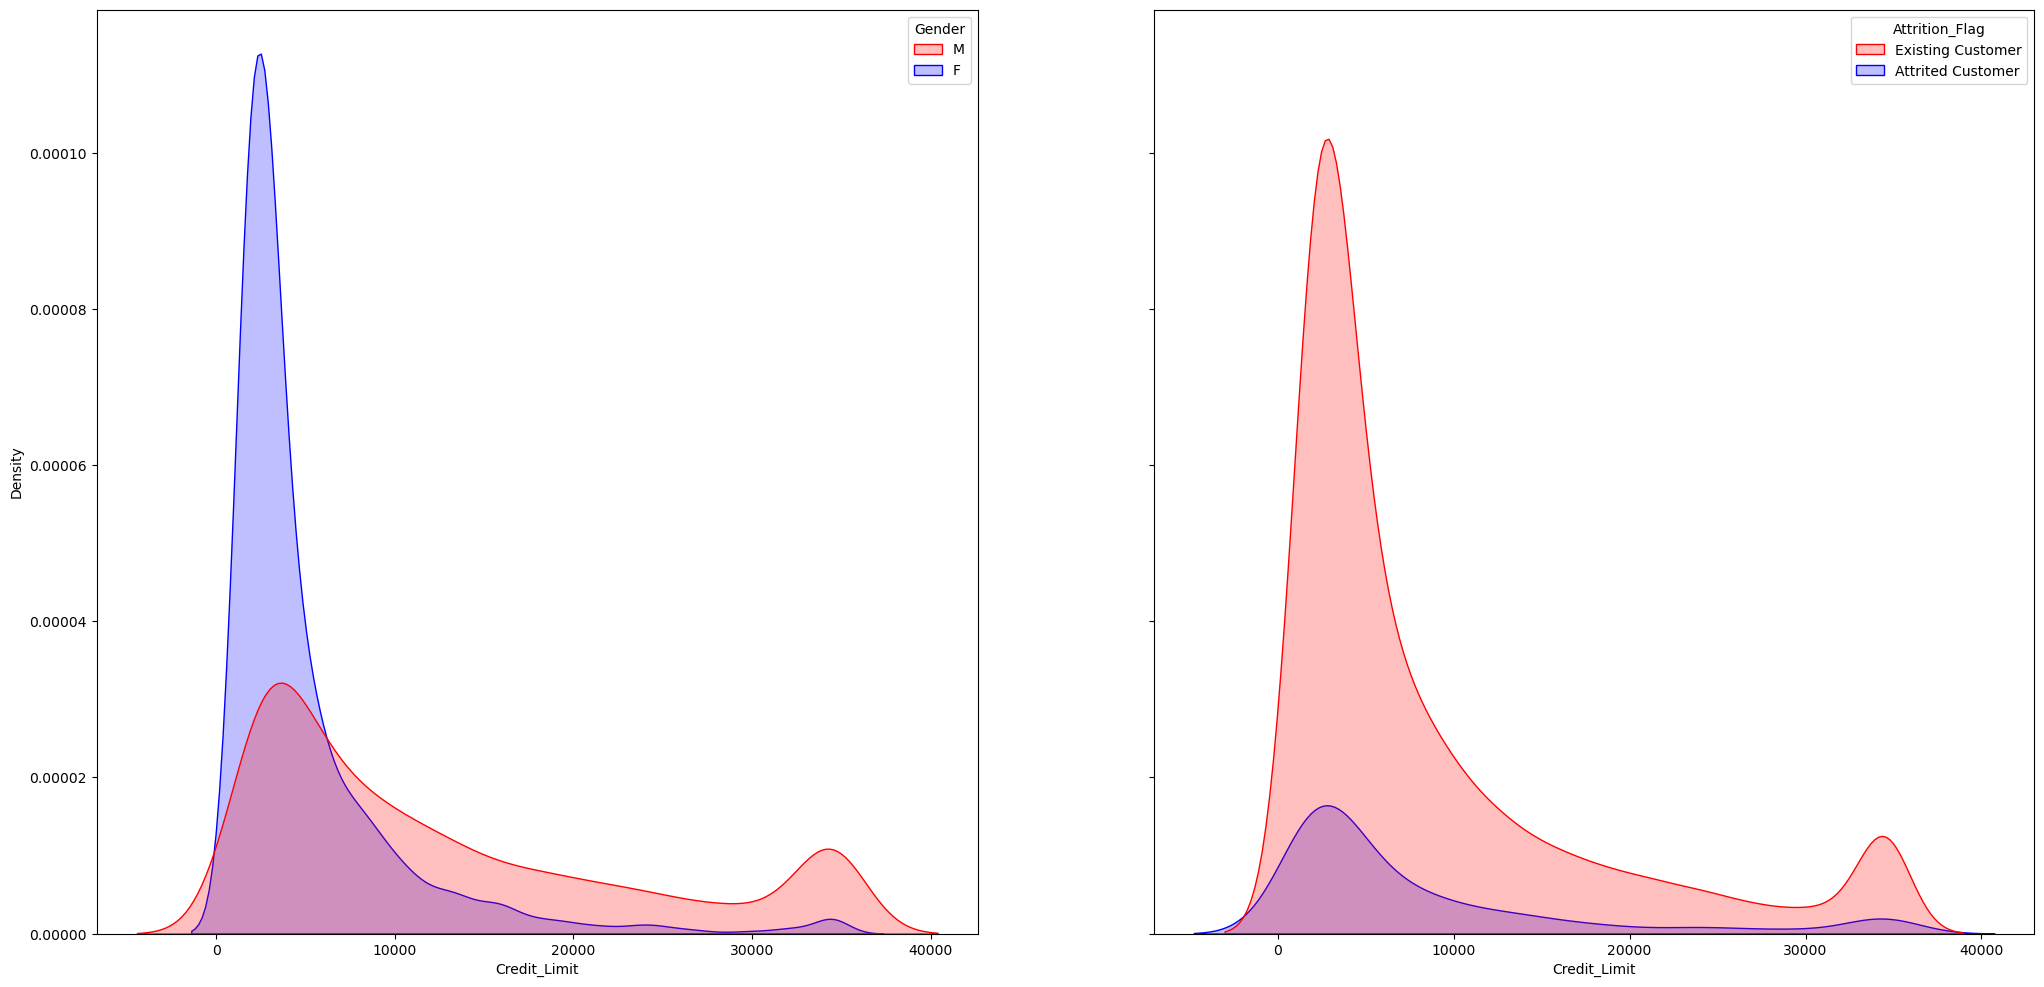

In [68]:
#Setting the figure.
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(25, 12))
#-------------------------------------------------------------------------------------------------------------------------------
#Plotting the Kernel Density Estimate plots.
sns.kdeplot(data=df, x="Credit_Limit", hue="Gender", fill=True,palette=["red", "blue"],ax=ax1)
sns.kdeplot(data=df, x="Credit_Limit", hue="Attrition_Flag", fill=True,palette=["red", "blue"],ax=ax2)

# Reading between the lines:    
    .A low credit limit is give more to the females where as make are give credit limit of varying amounts.
    .Attrited customer have far less credit limit than the existing ones.
    .One of the potential explanations as to why these customers atrrited from the bank..

# ---------------------------------------------------------------------------------------------------------------

# Diving deeper into credit limit

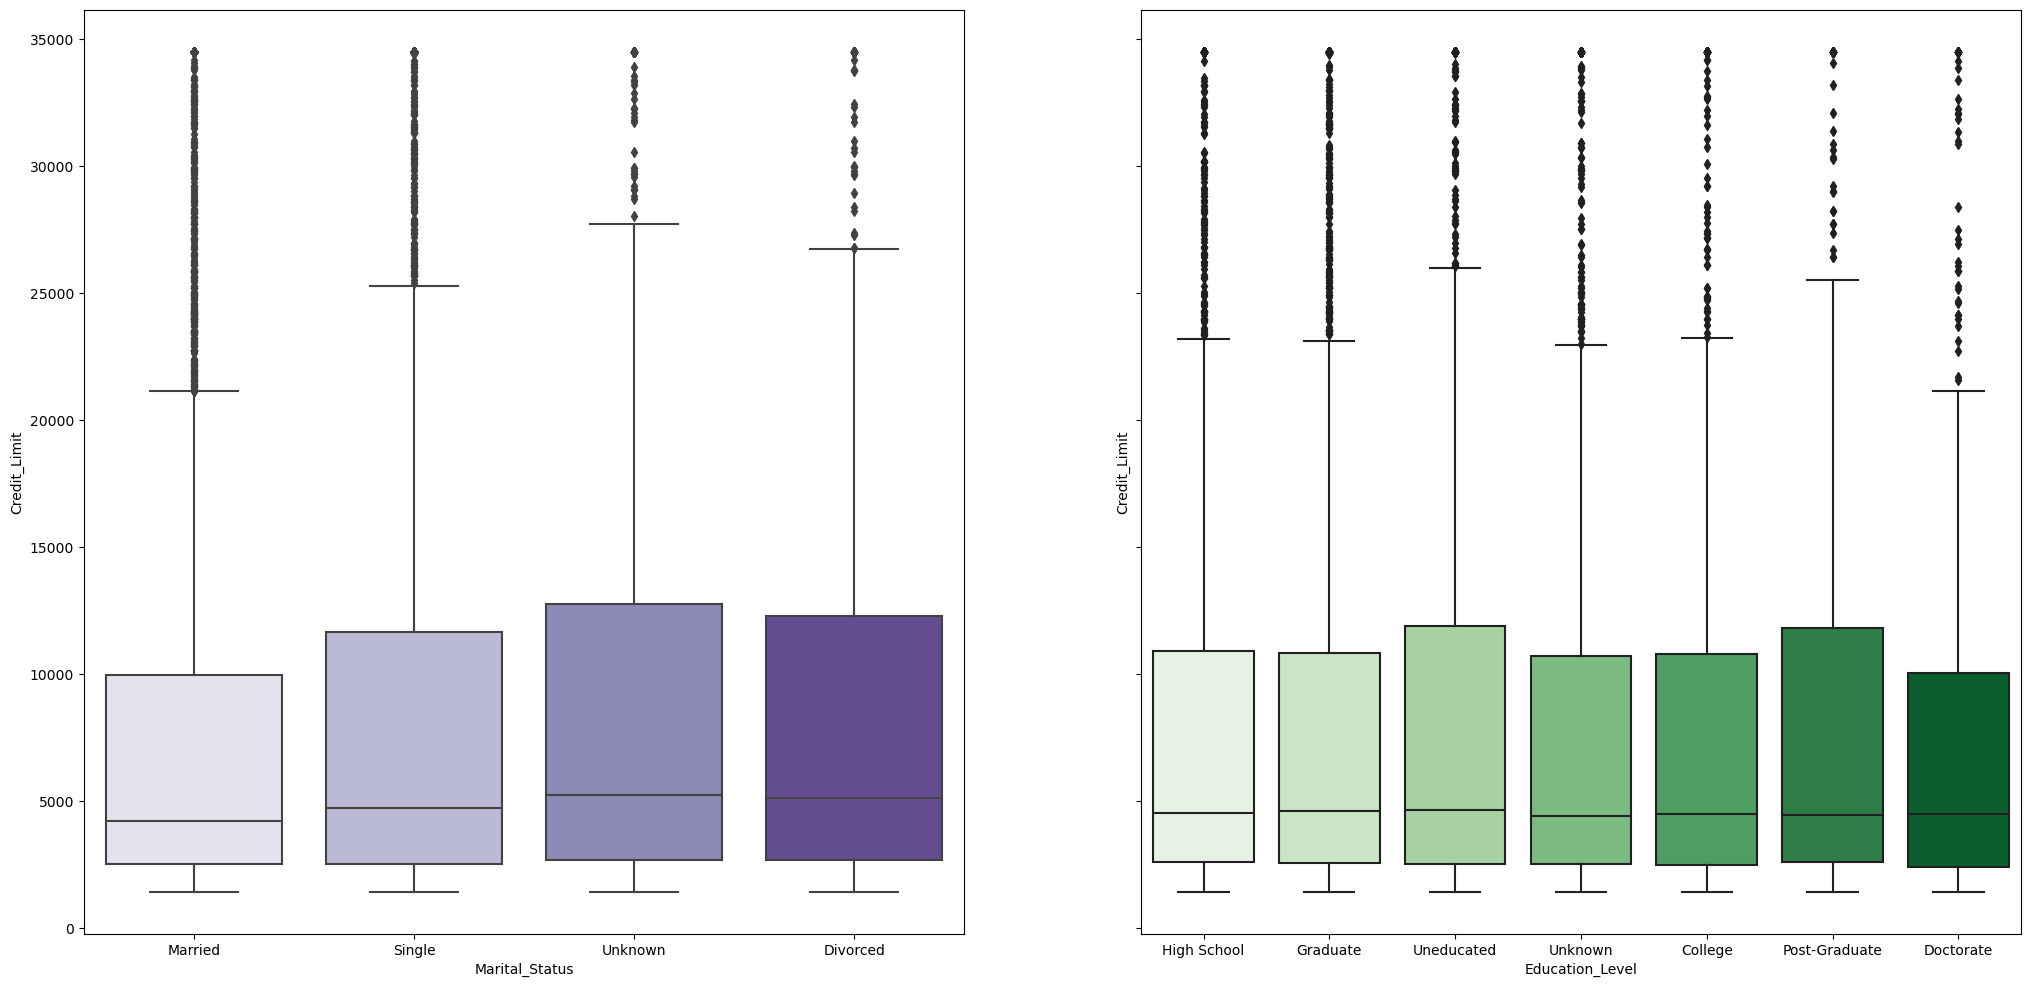

<Figure size 1500x1100 with 0 Axes>

In [48]:
# create a figure and two subplots with a shared y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(25, 12))
plt.figure(figsize=(15, 11))


# plot a kdeplot on the first subplot
sns.boxplot(data=df, y="Credit_Limit", x="Marital_Status",palette='Purples', ax=ax1)
# draw a vertical line on the first subplot

# plot a boxplot on the second subplot
sns.boxplot(data=df, y="Credit_Limit", x="Education_Level",palette='Greens', ax=ax2)

# show the figure
plt.show()

# These box plots:
    .Give an insight of the credit limit given to people with different educational and marital background.
    .Uneducated customers have more credit limit because they have a habit of taking loans for inconsequential purchases.

# ---------------------------------------------------------------------------------------------------------------

# Distribution of transacted anounts with some other variables

Text(0, 0.5, 'Total_Amt_Chng_Q4_Q1')

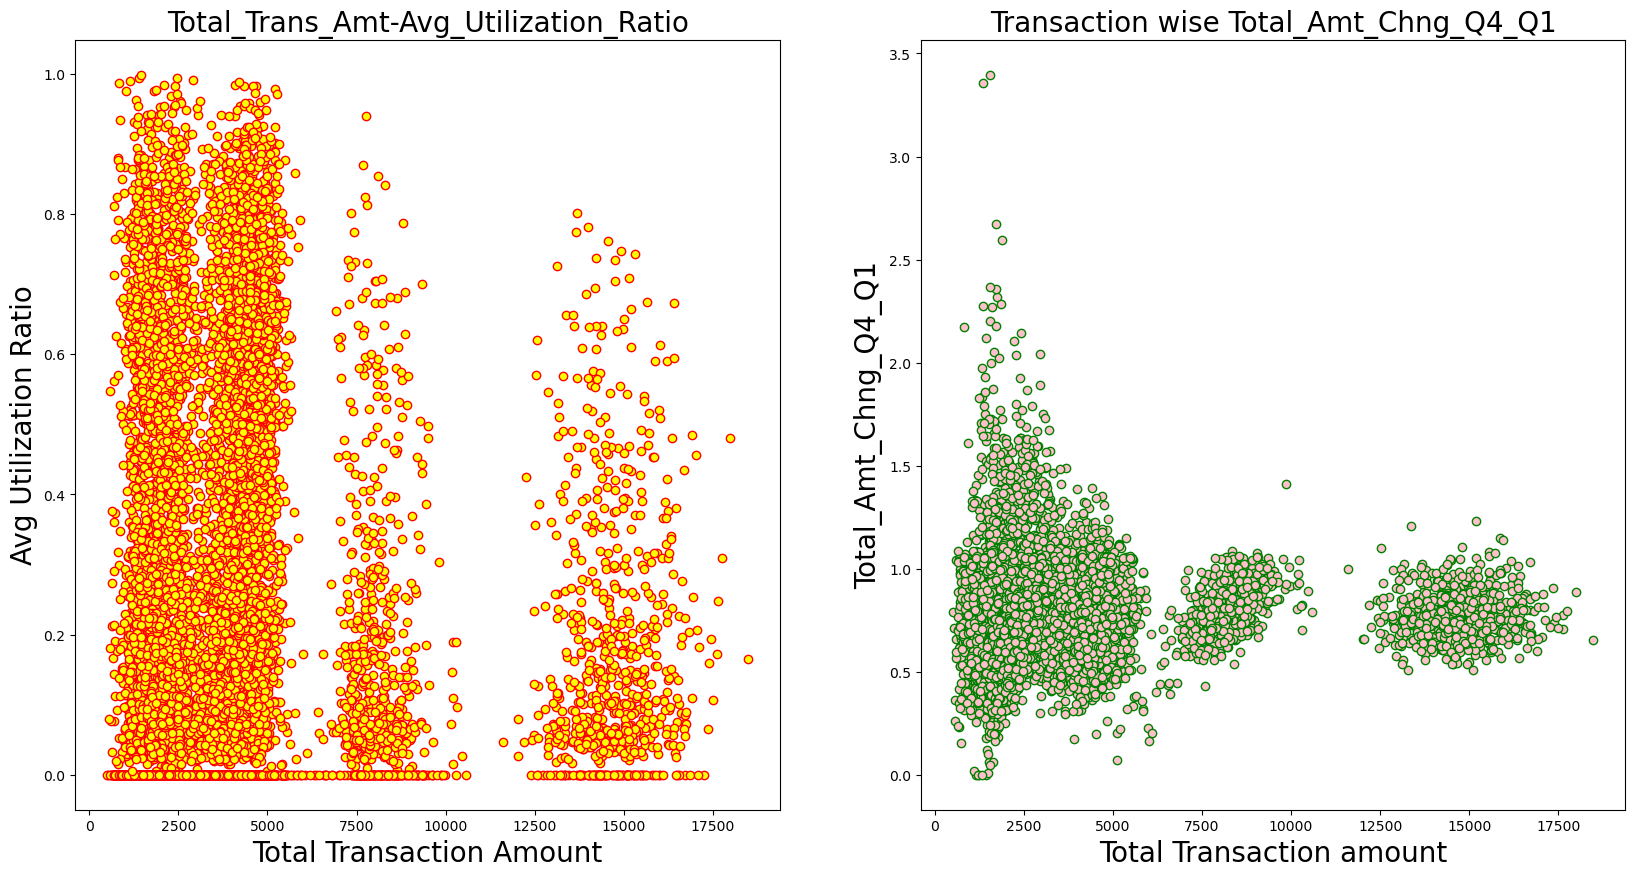

In [8]:
#Setting the figure.
fig, axs = plt.subplots(1, 2, figsize=(20,10))
#-------------------------------------------------------------------------------------------------------------------------------
#Plotting the scatter plot in the first section and setting the title, x and y label
axs[0].scatter(df['Total_Trans_Amt'], df['Avg_Utilization_Ratio'],facecolor='yellow',edgecolor='red')
axs[0].set_title('Total_Trans_Amt-Avg_Utilization_Ratio',fontsize=20)
axs[0].set_xlabel('Total Transaction Amount',fontsize=20)
axs[0].set_ylabel('Avg Utilization Ratio',fontsize=20)
#-------------------------------------------------------------------------------------------------------------------------------
#Plotting the scatter plot in the second section and setting the title, x and y label
axs[1].scatter(df['Total_Trans_Amt'], df['Total_Amt_Chng_Q4_Q1'],facecolor='pink',edgecolor='green')
axs[1].set_title('Transaction wise Total_Amt_Chng_Q4_Q1',fontsize=20)
axs[1].set_xlabel('Total Transaction amount',fontsize=20)
axs[1].set_ylabel('Total_Amt_Chng_Q4_Q1',fontsize=20)

# Based on the total transaction amount, customer can be categorized into three categories.
 
    1)Customer that transact substantial amount of money.
    2)Customer that transact descent amount of money.
    3)Customer that transact low amount of money.


# ---------------------------------------------------------------------------------------------------------------

In [11]:
# Only selection datatypes of type integer and float and storing them in a new dataset
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

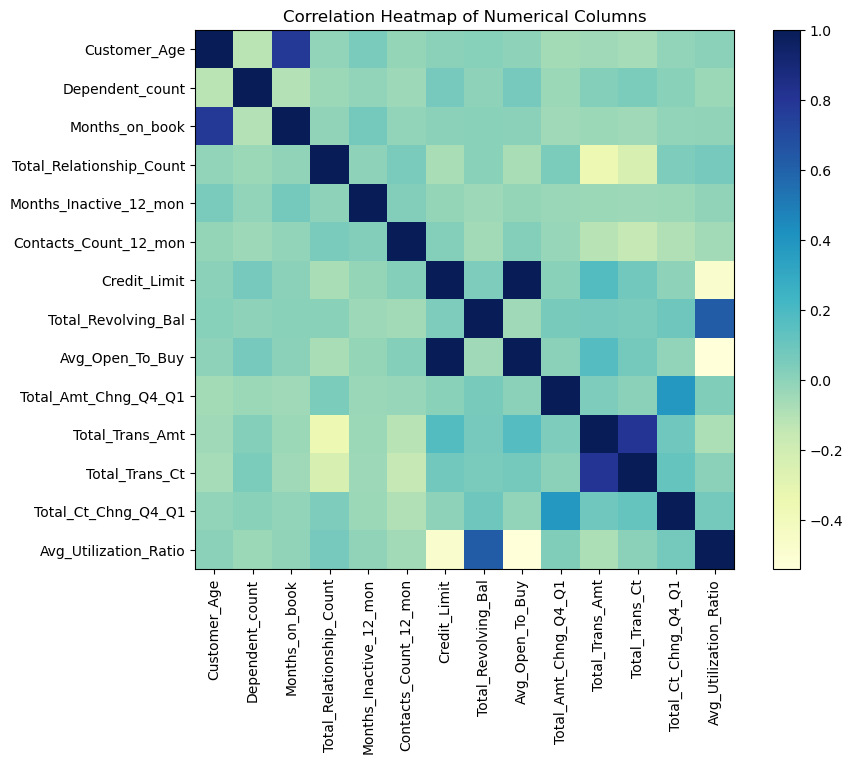

In [18]:
numerical_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
df_numerical = df[numerical_cols]
#-------------------------------------------------------------------------------------------------------------------------------
# Create a heatmap using the correlation matrix
corr = df_numerical.corr()
plt.figure(figsize=(10, 7))
plt.imshow(corr, cmap="YlGnBu")
plt.colorbar()
#-------------------------------------------------------------------------------------------------------------------------------
# Set the tick labels
plt.xticks(range(len(numerical_cols)), numerical_cols, rotation=90)
plt.yticks(range(len(numerical_cols)), numerical_cols)
#-------------------------------------------------------------------------------------------------------------------------------
# Set the plot title
plt.title("Correlation Heatmap of Numerical Columns")
#-------------------------------------------------------------------------------------------------------------------------------
# Show the plot
plt.show()

# Removing the heat from the heatmap:

        .Customer age and months in book are positively correlated.
        .The is a good new as it show the loyalty of the customer towards the bank.
        .Total revolving balance and average utilization ratio are also positively correlated.
        .This is beacuse higher the credit usage higher the average utilization ratio.

# ---------------------------------------------------------------------------------------------------------------

# The modelling starts

# ---------------------------------------------------------------------------------------------------------------

# Label encoding the category to be precicted

In [9]:
#Initializing the labelencoder
le = preprocessing.LabelEncoder() 

In [10]:
#Fitting inside the model
le.fit(df['Attrition_Flag'])

LabelEncoder()

# Overwriting the column after label encoding it.

In [11]:
df['Attrition_Flag'] = le.fit_transform(df['Attrition_Flag'])

# One hot encoding the categorical columns in the dataset

In [12]:
my_categories = df.select_dtypes(include=['object']).columns

In [14]:
my_categories = [col for col in my_categories if df[col].nunique() < 10]

In [17]:
#Initializing 
ohe = OneHotEncoder()

In [18]:
df_mycategories = pd.DataFrame(ohe.fit_transform(df[my_categories]).toarray(), columns=ohe.get_feature_names_out())

# Dropping all the categorical columns

In [19]:
df_onlynum = df.drop(columns=my_categories)

# Concatenating  the numericals and the categorical columns

In [22]:
#Getting the data read for training and testing.
df = pd.concat([df_onlynum,df_mycategories], axis=1)

# Train test split

In [25]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.42)

# Plotting the decision tree

In [33]:
clf = DecisionTreeClassifier(min_samples_split=1000)

In [34]:
clf = clf.fit(X_train, y_train)

In [35]:
from sklearn import tree

[Text(0.5, 0.9285714285714286, 'X[11] <= 57.5\ngini = 0.272\nsamples = 5873\nvalue = [955, 4918]'),
 Text(0.2, 0.7857142857142857, 'X[7] <= 573.0\ngini = 0.463\nsamples = 2179\nvalue = [793, 1386]'),
 Text(0.1, 0.6428571428571429, 'gini = 0.391\nsamples = 699\nvalue = [513, 186]'),
 Text(0.3, 0.6428571428571429, 'X[3] <= 2.5\ngini = 0.307\nsamples = 1480\nvalue = [280, 1200]'),
 Text(0.2, 0.5, 'gini = 0.332\nsamples = 133\nvalue = [105, 28]'),
 Text(0.4, 0.5, 'X[10] <= 2103.0\ngini = 0.226\nsamples = 1347\nvalue = [175, 1172]'),
 Text(0.3, 0.35714285714285715, 'gini = 0.113\nsamples = 962\nvalue = [58, 904]'),
 Text(0.5, 0.35714285714285715, 'gini = 0.423\nsamples = 385\nvalue = [117, 268]'),
 Text(0.8, 0.7857142857142857, 'X[10] <= 5271.0\ngini = 0.084\nsamples = 3694\nvalue = [162, 3532]'),
 Text(0.7, 0.6428571428571429, 'X[11] <= 63.5\ngini = 0.018\nsamples = 2798\nvalue = [26, 2772]'),
 Text(0.6, 0.5, 'gini = 0.115\nsamples = 360\nvalue = [22, 338]'),
 Text(0.8, 0.5, 'X[35] <= 0.5\

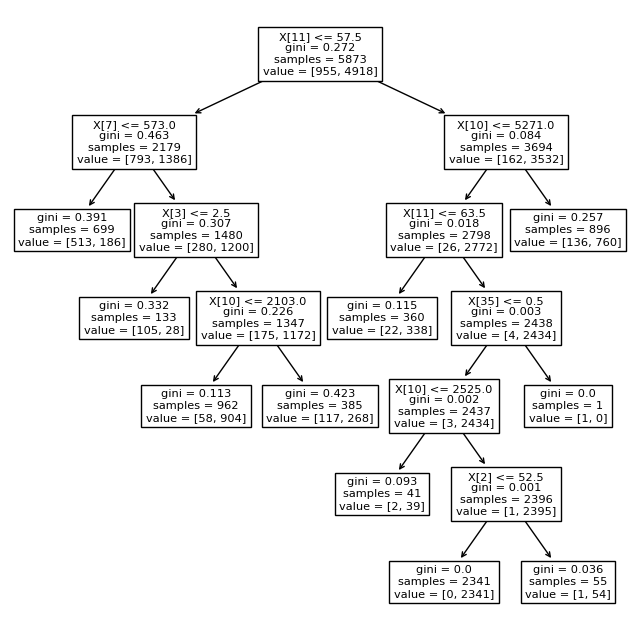

In [39]:
plt.figure(figsize = (8,8))
tree.plot_tree(clf)

# Checking the training accuracy score.

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
#Predicting the t train using x train and storing it inside a variable.
y_pred_train_clf = clf.predict(X_train)

In [52]:
accuracy = accuracy_score(y_train,y_pred_train_clf)

In [53]:
accuracy

0.9063510982462115

In [47]:
#Importing the confusion
from sklearn.metrics import confusion_matrix

In [48]:
cm = confusion_matrix(y_train,y_pred_train_clf)

Text(0.5, 1.0, 'Training confusion matrix')

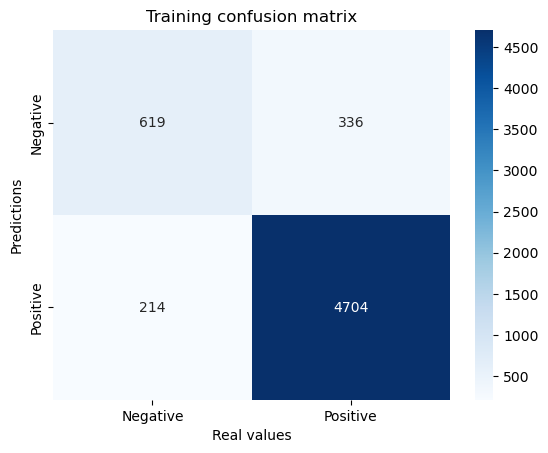

In [59]:
#Plotting the heat map.
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Real values')
plt.ylabel('Predictions')
plt.title('Training confusion matrix')

# Checking the testing accuracy score.

In [55]:
y_pred_test_clf = clf.predict(X_test)

In [56]:
accuracy = accuracy_score(y_test,y_pred_test_clf)

In [57]:
accuracy

0.8963328631875882

Text(0.5, 1.0, 'Testing confusion matrix')

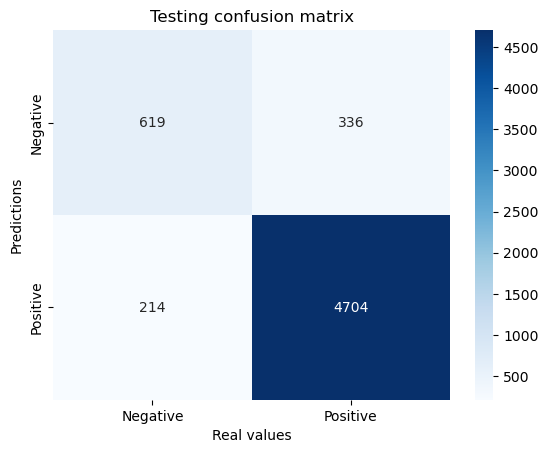

In [60]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Real values')
plt.ylabel('Predictions')
plt.title('Testing confusion matrix')